In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

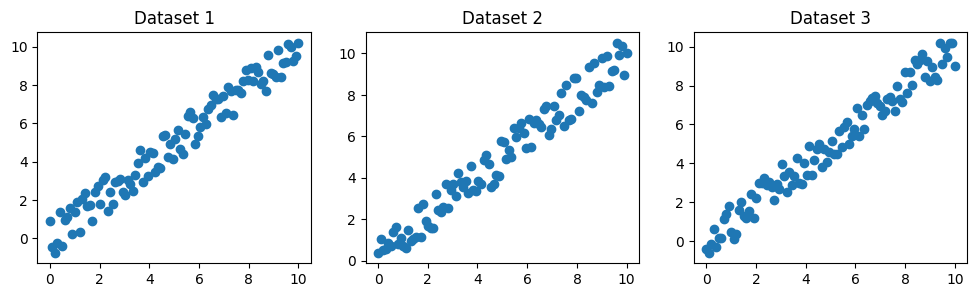

In [2]:
# Генерация "качественных" датасетов
xs1 = np.linspace(0, 10, 100)
ys1 = xs1 + np.random.random(100) * 2 - 1

xs2 = np.linspace(0, 10, 100)
ys2 = xs2 + np.random.random(100) * 2 - 1

xs3 = np.linspace(0, 10, 100)
ys3 = xs3 + np.random.random(100) * 2 - 1

# Визуализация
plt.figure(figsize=(12, 3))
for i, (x, y) in enumerate([(xs1, ys1), (xs2, ys2), (xs3, ys3)], 1):
    plt.subplot(1, 3, i)
    plt.scatter(x, y)
    plt.title(f"Dataset {i}")
plt.show()

In [3]:
# Обучение модели на одном из датасетов
model = LinearRegression()
model.fit(xs1.reshape(-1, 1), ys1)

preds = model.predict(xs1.reshape(-1, 1))
mse = mean_squared_error(ys1, preds)
print(f"Train MSE (Dataset 1): {mse:.4f}")

Train MSE (Dataset 1): 0.3762


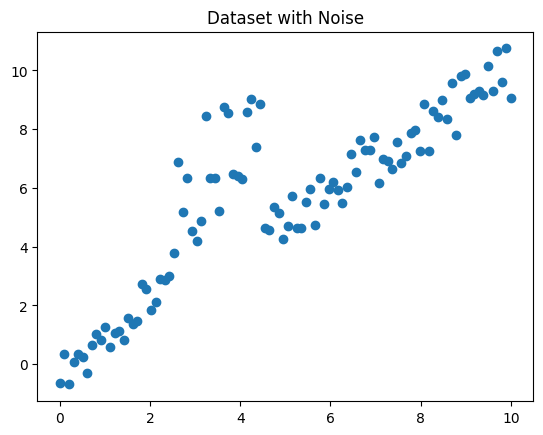

In [4]:
# Датасет с шумом
xs_noise = np.linspace(0, 10, 100)
ys_noise = xs_noise + np.random.random(100) * 2 - 1
ys_noise[25:45] *= 2  # добавляем шум

plt.scatter(xs_noise, ys_noise)
plt.title("Dataset with Noise")
plt.show()

In [5]:
# Запись тестов в файл test_model.py
%%writefile test_model.py
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_dataset(noise=False):
    xs = np.linspace(0, 10, 100)
    ys = xs + np.random.random(100) * 2 - 1
    if noise:
        ys[25:45] *= 2
    return xs.reshape(-1, 1), ys

def test_model_on_clean_data():
    X, y = generate_dataset(noise=False)
    model = LinearRegression().fit(X, y)
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    print("Clean data MSE:", mse)
    assert mse < 1.5

def test_model_on_noisy_data():
    X, y = generate_dataset(noise=True)
    model = LinearRegression().fit(X, y)
    preds = model.predict(X)
    mse = mean_squared_error(y, preds)
    print("Noisy data MSE:", mse)
    assert mse > 1.5

Writing test_model.py


In [6]:
# Запуск тестов с pytest
!pytest test_model.py -v

============================= test session starts ==============================
platform linux -- Python 3.11.12, pytest-8.3.5, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: langsmith-0.3.42, anyio-4.9.0, typeguard-4.4.2
collected 2 items                                                              

test_model.py::test_model_on_clean_data PASSED                           [ 50%]
test_model.py::test_model_on_noisy_data PASSED                           [100%]

============================== 2 passed in 2.24s ===============================
